# Build a Model

Dataset: Fashion-MNIST https://keras.io/api/datasets/fashion_mnist/

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import CategoricalCrossentropy as ccEnLo
#from tensorflow.keras.metrics import CategoricalCrossentropy as ccEnMe

from tensorflow.keras import backend as K

import scipy

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

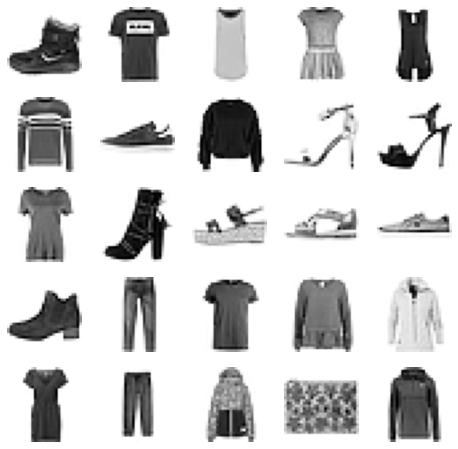

In [2]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

## 1. Preparing our data
Don't flatten our images! But we need to reshape a bit, so it is 4-dimensional: number of samples, height, width, depth/color-channels. 

In [3]:
x_train = xtrain.reshape(60000, 28, 28, 1)/255
x_test = xtest.reshape(10000, 28, 28, 1)/255

y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

## 2. Building the model

In [4]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(28, 28, 1), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),        
    Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                80050     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0

## 3. Compiling the model

In [6]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4. Training the model

In [7]:
h = model.fit(x_train, y_train, epochs=15, batch_size=200, validation_split=0.2, use_multiprocessing = True)

Epoch 1/15
240/240 [==============================] - 25s 100ms/step - loss: 1.3075 - accuracy: 0.5338 - val_loss: 0.5100 - val_accuracy: 0.8138
Epoch 2/15
240/240 [==============================] - 24s 100ms/step - loss: 0.6338 - accuracy: 0.7706 - val_loss: 0.4335 - val_accuracy: 0.8420
Epoch 3/15
240/240 [==============================] - 19s 77ms/step - loss: 0.5555 - accuracy: 0.7994 - val_loss: 0.3884 - val_accuracy: 0.8588
Epoch 4/15
240/240 [==============================] - 17s 69ms/step - loss: 0.5028 - accuracy: 0.8226 - val_loss: 0.3662 - val_accuracy: 0.8683
Epoch 5/15
240/240 [==============================] - 23s 97ms/step - loss: 0.4684 - accuracy: 0.8307 - val_loss: 0.3522 - val_accuracy: 0.8708
Epoch 6/15
240/240 [==============================] - 20s 85ms/step - loss: 0.4446 - accuracy: 0.8386 - val_loss: 0.3311 - val_accuracy: 0.8816
Epoch 7/15
240/240 [==============================] - 19s 80ms/step - loss: 0.4248 - accuracy: 0.8470 - val_loss: 0.3339 - val_accurac

## 5. Evaluate and tune 

In [8]:
score = model.evaluate(x_train, y_train, batch_size=100)
score

600/600 [==============================] - 15s 25ms/step - loss: 0.2393 - accuracy: 0.9107


[0.23928306996822357, 0.9106500148773193]

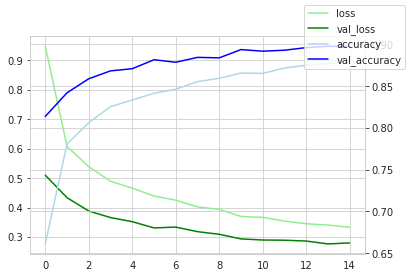

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(h.history['loss'], color="lightgreen", label="loss") 
ax1.plot(h.history['val_loss'], color="green", label="val_loss") 
ax2 = ax1.twinx()
ax2.plot(h.history['accuracy'], color="lightblue", label='accuracy') 
ax2.plot(h.history['val_accuracy'], color="blue", label='val_accuracy') 
fig.legend()

Hyperparameters: 
- number of layers,
- number of filters, 
- filter-size, 
- max/mean pooling, 
- stride (filter and pooling),
- regularization,
- epochs,
- ...

In [10]:
test_set_score = model.evaluate(x_test, y_test, verbose=1)
print("Test set loss:", test_set_score[0])
print("Test set accuracy:", test_set_score[1])

313/313 [==============================] - 7s 20ms/step - loss: 0.2945 - accuracy: 0.8944
Test set loss: 0.2944992184638977
Test set accuracy: 0.8944000005722046


# Further reading:

**VGG16-architecture**  
https://neurohive.io/en/popular-networks/vgg16/

**Stanford Ressource**  
https://cs231n.github.io/convolutional-networks/

**Dive into the math behind convolutional neural networks**    
https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

**Visualization toolbox**  
https://www.youtube.com/watch?v=AgkfIQ4IGaM

**How to visualize filters in cnns**  
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

**How to visualize filters in deep layers**  
https://www.researchgate.net/profile/Aaron_Courville/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network/links/53ff82b00cf24c81027da530.pdf

**Self-driving car with CNN - video-series**   
 https://www.youtube.com/watch?v=oLi6mWDXRGM

**Little drawing game based on ConvNet:**  
https://quickdraw.withgoogle.com/